<a href="https://colab.research.google.com/github/gk24015/ml_models/blob/master/Autoencoder_Self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Processing

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfa = pd.read_csv("drive/MyDrive/Dataset/Self_bio/Accelerometer.csv")
dfg=pd.read_csv("drive/MyDrive/Dataset/Self_bio/Gyroscope.csv")
dfo=pd.read_csv("drive/MyDrive/Dataset/Self_bio/Orientation.csv")
dfal = pd.read_csv("drive/MyDrive/Dataset/Self_bio/Accelerometerl.csv")
dfgl=pd.read_csv("drive/MyDrive/Dataset/Self_bio/Gyroscopel.csv")
dfol=pd.read_csv("drive/MyDrive/Dataset/Self_bio/Orientationl.csv")


In [ ]:
dfa.head()

,time,seconds_elapsed,z,y,x
0,1687539848896207600,0.132208,-0.094045,0.029697,0.006971
1,1687539848996667400,0.232667,0.012434,-0.193367,-0.166482
2,1687539849097127400,0.333127,-0.094994,0.043218,-0.043005
3,1687539849197587500,0.433587,-0.058878,0.048452,0.064033
4,1687539849298047500,0.534048,-0.030434,-0.039466,-0.068759


In [ ]:
dfg.head()

,time,seconds_elapsed,z,y,x
0,1687539848896207600,0.132208,0.005058,-0.045060,0.118846
1,1687539848996667400,0.232667,-0.036664,-0.009427,0.053545
2,1687539849097127400,0.333127,0.024652,0.043465,0.039192
3,1687539849197587500,0.433587,0.000115,0.014417,-0.000094
4,1687539849298047500,0.534048,0.023606,0.012286,0.026574


In [ ]:
dfo.head()

,time,seconds_elapsed,yaw,qx,qz,roll,qw,qy,pitch
0,1687539848896207600,0.132208,-1.466277,-0.127327,0.659491,-0.014982,-0.730299,0.124588,0.357895
1,1687539848996667400,0.232667,-1.467832,-0.129525,0.659736,-0.017924,-0.728978,0.128697,0.366826
2,1687539849097127400,0.333127,-1.468685,-0.131779,0.659659,-0.016471,-0.728435,0.129869,0.371833
3,1687539849197587500,0.433587,-1.465522,-0.133384,0.658242,-0.013583,-0.729577,0.129011,0.373062
4,1687539849298047500,0.534048,-1.464296,-0.134301,0.657637,-0.011974,-0.730024,0.128618,0.373905


In [ ]:
dfa = dfa.rename(columns={'x': 'ax', 'y': 'ay','z':'az'})
dfg = dfg.rename(columns={'x': 'gx', 'y': 'gy','z':'gz'})
dfal = dfal.rename(columns={'x': 'ax', 'y': 'ay','z':'az'})
dfgl = dfgl.rename(columns={'x': 'gx', 'y': 'gy','z':'gz'})

In [ ]:
dfa

,time,seconds_elapsed,az,ay,ax
0,1687539848896207600,0.132208,-0.094045,0.029697,0.006971
1,1687539848996667400,0.232667,0.012434,-0.193367,-0.166482
2,1687539849097127400,0.333127,-0.094994,0.043218,-0.043005
3,1687539849197587500,0.433587,-0.058878,0.048452,0.064033
4,1687539849298047500,0.534048,-0.030434,-0.039466,-0.068759
5,1687539849398507500,0.634508,-0.045468,0.001823,-0.112508
6,1687539849498967300,0.734967,-0.092388,0.038379,-0.062404
7,1687539849599427600,0.835427,-0.155670,0.070917,0.076152
8,1687539849699887600,0.935888,0.070616,0.202757,-0.077823
9,1687539849800347600,1.036348,0.066529,0.031260,-0.158335


In [ ]:
dfal

,time,seconds_elapsed,az,ay,ax
0,1687596149213179600,0.038180,-0.072703,-0.069248,0.033503
1,1687596149233269800,0.058270,-0.120229,-0.030535,0.004059
2,1687596149253358600,0.078359,-0.180402,-0.066638,-0.028747
3,1687596149273448700,0.098449,-0.198679,-0.076062,0.047787
4,1687596149293538600,0.118539,-0.140852,-0.042218,0.045969
5,1687596149313628700,0.138629,-0.037222,-0.044756,0.007841
6,1687596149333718500,0.158719,-0.078958,-0.062956,-0.004151
7,1687596149353808600,0.178809,-0.169289,-0.070994,0.081155
8,1687596149373897500,0.198897,-0.059399,-0.039510,0.131175
9,1687596149393987600,0.218988,0.038487,-0.013654,0.028673


In [ ]:
dfa

,time,seconds_elapsed,az,ay,ax
0,1687539848896207600,0.132208,-0.094045,0.029697,0.006971
1,1687539848996667400,0.232667,0.012434,-0.193367,-0.166482
2,1687539849097127400,0.333127,-0.094994,0.043218,-0.043005
3,1687539849197587500,0.433587,-0.058878,0.048452,0.064033
4,1687539849298047500,0.534048,-0.030434,-0.039466,-0.068759
5,1687539849398507500,0.634508,-0.045468,0.001823,-0.112508
6,1687539849498967300,0.734967,-0.092388,0.038379,-0.062404
7,1687539849599427600,0.835427,-0.155670,0.070917,0.076152
8,1687539849699887600,0.935888,0.070616,0.202757,-0.077823
9,1687539849800347600,1.036348,0.066529,0.031260,-0.158335


In [ ]:
dfg.head()

,time,seconds_elapsed,gz,gy,gx
0,1687539848896207600,0.132208,0.005058,-0.045060,0.118846
1,1687539848996667400,0.232667,-0.036664,-0.009427,0.053545
2,1687539849097127400,0.333127,0.024652,0.043465,0.039192
3,1687539849197587500,0.433587,0.000115,0.014417,-0.000094
4,1687539849298047500,0.534048,0.023606,0.012286,0.026574


In [ ]:
dfa

,time,seconds_elapsed,az,ay,ax
0,1687539848896207600,0.132208,-0.094045,0.029697,0.006971
1,1687539848996667400,0.232667,0.012434,-0.193367,-0.166482
2,1687539849097127400,0.333127,-0.094994,0.043218,-0.043005
3,1687539849197587500,0.433587,-0.058878,0.048452,0.064033
4,1687539849298047500,0.534048,-0.030434,-0.039466,-0.068759
5,1687539849398507500,0.634508,-0.045468,0.001823,-0.112508
6,1687539849498967300,0.734967,-0.092388,0.038379,-0.062404
7,1687539849599427600,0.835427,-0.155670,0.070917,0.076152
8,1687539849699887600,0.935888,0.070616,0.202757,-0.077823
9,1687539849800347600,1.036348,0.066529,0.031260,-0.158335


In [ ]:
df3=pd.merge(dfa, dfg, on='time')
df3

,time,seconds_elapsed_x,az,ay,ax,seconds_elapsed_y,gz,gy,gx
0,1687539848896207600,0.132208,-0.094045,0.029697,0.006971,0.132208,0.005058,-0.045060,0.118846
1,1687539848996667400,0.232667,0.012434,-0.193367,-0.166482,0.232667,-0.036664,-0.009427,0.053545
2,1687539849097127400,0.333127,-0.094994,0.043218,-0.043005,0.333127,0.024652,0.043465,0.039192
3,1687539849197587500,0.433587,-0.058878,0.048452,0.064033,0.433587,0.000115,0.014417,-0.000094
4,1687539849298047500,0.534048,-0.030434,-0.039466,-0.068759,0.534048,0.023606,0.012286,0.026574
5,1687539849398507500,0.634508,-0.045468,0.001823,-0.112508,0.634508,0.006847,0.029844,0.014316
6,1687539849498967300,0.734967,-0.092388,0.038379,-0.062404,0.734967,0.019087,0.025959,-0.022664
7,1687539849599427600,0.835427,-0.155670,0.070917,0.076152,0.835427,0.036562,0.010446,0.007735
8,1687539849699887600,0.935888,0.070616,0.202757,-0.077823,0.935888,0.047794,0.071106,-0.087721
9,1687539849800347600,1.036348,0.066529,0.031260,-0.158335,1.036348,-0.027525,0.022239,0.071696


In [ ]:
df3=pd.merge(df3,dfo,on='time')
df3l=pd.merge(dfal, dfgl, on='time')
df3l=pd.merge(df3l,dfol,on='time')

In [ ]:
df3l

,time,seconds_elapsed_x,az,ay,ax,seconds_elapsed_y,gz,gy,gx,seconds_elapsed,yaw,qx,qz,roll,qw,qy,pitch
0,1687596149213179600,0.038180,-0.072703,-0.069248,0.033503,0.038180,-0.016189,-0.001008,-0.012141,0.038180,-0.795710,0.189044,-0.385614,-0.079277,0.894893,-0.121367,0.446653
1,1687596149233269800,0.058270,-0.120229,-0.030535,0.004059,0.058270,-0.015814,0.015722,-0.014932,0.058270,-0.796104,0.188962,-0.385775,-0.079052,0.894856,-0.121262,0.446428
2,1687596149253358600,0.078359,-0.180402,-0.066638,-0.028747,0.078359,-0.016058,0.020860,0.000380,0.078359,-0.796521,0.189008,-0.385906,-0.078433,0.894824,-0.121005,0.446322
3,1687596149273448700,0.098449,-0.198679,-0.076062,0.047787,0.098449,-0.027271,-0.037114,0.046559,0.098449,-0.797009,0.189189,-0.386107,-0.078372,0.894685,-0.121105,0.446762
4,1687596149293538600,0.118539,-0.140852,-0.042218,0.045969,0.118539,-0.042548,-0.064535,0.087863,0.118539,-0.797698,0.189666,-0.386446,-0.079087,0.894349,-0.121760,0.448221
5,1687596149313628700,0.138629,-0.037222,-0.044756,0.007841,0.138629,-0.055076,-0.078248,0.102387,0.138629,-0.798612,0.190303,-0.386910,-0.080205,0.893882,-0.122720,0.450237
6,1687596149333718500,0.158719,-0.078958,-0.062956,-0.004151,0.158719,-0.072572,-0.069288,0.103539,0.158719,-0.799874,0.191047,-0.387507,-0.081140,0.893334,-0.123671,0.452465
7,1687596149353808600,0.178809,-0.169289,-0.070994,0.081155,0.178809,-0.080821,-0.058821,0.097503,0.178809,-0.801440,0.191779,-0.388208,-0.081719,0.892762,-0.124467,0.454558
8,1687596149373897500,0.198897,-0.059399,-0.039510,0.131175,0.198897,-0.086455,-0.068971,0.094207,0.198897,-0.803158,0.192504,-0.388959,-0.082094,0.892180,-0.125174,0.456570
9,1687596149393987600,0.218988,0.038487,-0.013654,0.028673,0.218988,-0.071952,-0.083693,0.088722,0.218988,-0.804845,0.193122,-0.389740,-0.082925,0.891578,-0.126073,0.458539


In [ ]:
df3=df3.drop(['seconds_elapsed'],axis=1)
df3l=df3l.drop(['seconds_elapsed'],axis=1)

In [ ]:
df3=df3.drop(['seconds_elapsed_x'],axis=1)
df3l=df3l.drop(['seconds_elapsed_x'],axis=1)

In [ ]:
df3=df3.drop(['seconds_elapsed_y'],axis=1)
df3l=df3l.drop(['seconds_elapsed_y'],axis=1)

In [ ]:
df3['time']=0
df3l['time']=1

In [ ]:
df3

,time,az,ay,ax,gz,gy,gx,yaw,qx,qz,roll,qw,qy,pitch
0,0,-0.094045,0.029697,0.006971,0.005058,-0.045060,0.118846,-1.466277,-0.127327,0.659491,-0.014982,-0.730299,0.124588,0.357895
1,0,0.012434,-0.193367,-0.166482,-0.036664,-0.009427,0.053545,-1.467832,-0.129525,0.659736,-0.017924,-0.728978,0.128697,0.366826
2,0,-0.094994,0.043218,-0.043005,0.024652,0.043465,0.039192,-1.468685,-0.131779,0.659659,-0.016471,-0.728435,0.129869,0.371833
3,0,-0.058878,0.048452,0.064033,0.000115,0.014417,-0.000094,-1.465522,-0.133384,0.658242,-0.013583,-0.729577,0.129011,0.373062
4,0,-0.030434,-0.039466,-0.068759,0.023606,0.012286,0.026574,-1.464296,-0.134301,0.657637,-0.011974,-0.730024,0.128618,0.373905
5,0,-0.045468,0.001823,-0.112508,0.006847,0.029844,0.014316,-1.463655,-0.134330,0.657386,-0.010586,-0.730414,0.127649,0.372626
6,0,-0.092388,0.038379,-0.062404,0.019087,0.025959,-0.022664,-1.463567,-0.134990,0.657242,-0.010261,-0.730358,0.128015,0.374122
7,0,-0.155670,0.070917,0.076152,0.036562,0.010446,0.007735,-1.459940,-0.133801,0.656139,-0.009588,-0.731907,0.126057,0.369641
8,0,0.070616,0.202757,-0.077823,0.047794,0.071106,-0.087721,-1.455705,-0.137196,0.654135,-0.013647,-0.732165,0.131222,0.381781
9,0,0.066529,0.031260,-0.158335,-0.027525,0.022239,0.071696,-1.454363,-0.136364,0.653790,-0.013302,-0.732831,0.130088,0.378969


In [ ]:
datal=df3l.head(200)

In [ ]:
df3

,time,az,ay,ax,gz,gy,gx,yaw,qx,qz,roll,qw,qy,pitch
0,0,-0.094045,0.029697,0.006971,0.005058,-0.045060,0.118846,-1.466277,-0.127327,0.659491,-0.014982,-0.730299,0.124588,0.357895
1,0,0.012434,-0.193367,-0.166482,-0.036664,-0.009427,0.053545,-1.467832,-0.129525,0.659736,-0.017924,-0.728978,0.128697,0.366826
2,0,-0.094994,0.043218,-0.043005,0.024652,0.043465,0.039192,-1.468685,-0.131779,0.659659,-0.016471,-0.728435,0.129869,0.371833
3,0,-0.058878,0.048452,0.064033,0.000115,0.014417,-0.000094,-1.465522,-0.133384,0.658242,-0.013583,-0.729577,0.129011,0.373062
4,0,-0.030434,-0.039466,-0.068759,0.023606,0.012286,0.026574,-1.464296,-0.134301,0.657637,-0.011974,-0.730024,0.128618,0.373905
5,0,-0.045468,0.001823,-0.112508,0.006847,0.029844,0.014316,-1.463655,-0.134330,0.657386,-0.010586,-0.730414,0.127649,0.372626
6,0,-0.092388,0.038379,-0.062404,0.019087,0.025959,-0.022664,-1.463567,-0.134990,0.657242,-0.010261,-0.730358,0.128015,0.374122
7,0,-0.155670,0.070917,0.076152,0.036562,0.010446,0.007735,-1.459940,-0.133801,0.656139,-0.009588,-0.731907,0.126057,0.369641
8,0,0.070616,0.202757,-0.077823,0.047794,0.071106,-0.087721,-1.455705,-0.137196,0.654135,-0.013647,-0.732165,0.131222,0.381781
9,0,0.066529,0.031260,-0.158335,-0.027525,0.022239,0.071696,-1.454363,-0.136364,0.653790,-0.013302,-0.732831,0.130088,0.378969


In [ ]:
datal

,time,az,ay,ax,gz,gy,gx,yaw,qx,qz,roll,qw,qy,pitch
0,1,-0.072703,-0.069248,0.033503,-0.016189,-0.001008,-0.012141,-0.795710,0.189044,-0.385614,-0.079277,0.894893,-0.121367,0.446653
1,1,-0.120229,-0.030535,0.004059,-0.015814,0.015722,-0.014932,-0.796104,0.188962,-0.385775,-0.079052,0.894856,-0.121262,0.446428
2,1,-0.180402,-0.066638,-0.028747,-0.016058,0.020860,0.000380,-0.796521,0.189008,-0.385906,-0.078433,0.894824,-0.121005,0.446322
3,1,-0.198679,-0.076062,0.047787,-0.027271,-0.037114,0.046559,-0.797009,0.189189,-0.386107,-0.078372,0.894685,-0.121105,0.446762
4,1,-0.140852,-0.042218,0.045969,-0.042548,-0.064535,0.087863,-0.797698,0.189666,-0.386446,-0.079087,0.894349,-0.121760,0.448221
5,1,-0.037222,-0.044756,0.007841,-0.055076,-0.078248,0.102387,-0.798612,0.190303,-0.386910,-0.080205,0.893882,-0.122720,0.450237
6,1,-0.078958,-0.062956,-0.004151,-0.072572,-0.069288,0.103539,-0.799874,0.191047,-0.387507,-0.081140,0.893334,-0.123671,0.452465
7,1,-0.169289,-0.070994,0.081155,-0.080821,-0.058821,0.097503,-0.801440,0.191779,-0.388208,-0.081719,0.892762,-0.124467,0.454558
8,1,-0.059399,-0.039510,0.131175,-0.086455,-0.068971,0.094207,-0.803158,0.192504,-0.388959,-0.082094,0.892180,-0.125174,0.456570
9,1,0.038487,-0.013654,0.028673,-0.071952,-0.083693,0.088722,-0.804845,0.193122,-0.389740,-0.082925,0.891578,-0.126073,0.458539


In [ ]:
data=df3
data

,time,az,ay,ax,gz,gy,gx,yaw,qx,qz,roll,qw,qy,pitch
0,0,-0.094045,0.029697,0.006971,0.005058,-0.045060,0.118846,-1.466277,-0.127327,0.659491,-0.014982,-0.730299,0.124588,0.357895
1,0,0.012434,-0.193367,-0.166482,-0.036664,-0.009427,0.053545,-1.467832,-0.129525,0.659736,-0.017924,-0.728978,0.128697,0.366826
2,0,-0.094994,0.043218,-0.043005,0.024652,0.043465,0.039192,-1.468685,-0.131779,0.659659,-0.016471,-0.728435,0.129869,0.371833
3,0,-0.058878,0.048452,0.064033,0.000115,0.014417,-0.000094,-1.465522,-0.133384,0.658242,-0.013583,-0.729577,0.129011,0.373062
4,0,-0.030434,-0.039466,-0.068759,0.023606,0.012286,0.026574,-1.464296,-0.134301,0.657637,-0.011974,-0.730024,0.128618,0.373905
5,0,-0.045468,0.001823,-0.112508,0.006847,0.029844,0.014316,-1.463655,-0.134330,0.657386,-0.010586,-0.730414,0.127649,0.372626
6,0,-0.092388,0.038379,-0.062404,0.019087,0.025959,-0.022664,-1.463567,-0.134990,0.657242,-0.010261,-0.730358,0.128015,0.374122
7,0,-0.155670,0.070917,0.076152,0.036562,0.010446,0.007735,-1.459940,-0.133801,0.656139,-0.009588,-0.731907,0.126057,0.369641
8,0,0.070616,0.202757,-0.077823,0.047794,0.071106,-0.087721,-1.455705,-0.137196,0.654135,-0.013647,-0.732165,0.131222,0.381781
9,0,0.066529,0.031260,-0.158335,-0.027525,0.022239,0.071696,-1.454363,-0.136364,0.653790,-0.013302,-0.732831,0.130088,0.378969


In [ ]:
data=pd.concat([data,datal],axis=0)

In [ ]:
data[data['time']==0]

,time,az,ay,ax,gz,gy,gx,yaw,qx,qz,roll,qw,qy,pitch
0,0,-0.094045,0.029697,0.006971,0.005058,-0.045060,0.118846,-1.466277,-0.127327,0.659491,-0.014982,-0.730299,0.124588,0.357895
1,0,0.012434,-0.193367,-0.166482,-0.036664,-0.009427,0.053545,-1.467832,-0.129525,0.659736,-0.017924,-0.728978,0.128697,0.366826
2,0,-0.094994,0.043218,-0.043005,0.024652,0.043465,0.039192,-1.468685,-0.131779,0.659659,-0.016471,-0.728435,0.129869,0.371833
3,0,-0.058878,0.048452,0.064033,0.000115,0.014417,-0.000094,-1.465522,-0.133384,0.658242,-0.013583,-0.729577,0.129011,0.373062
4,0,-0.030434,-0.039466,-0.068759,0.023606,0.012286,0.026574,-1.464296,-0.134301,0.657637,-0.011974,-0.730024,0.128618,0.373905
5,0,-0.045468,0.001823,-0.112508,0.006847,0.029844,0.014316,-1.463655,-0.134330,0.657386,-0.010586,-0.730414,0.127649,0.372626
6,0,-0.092388,0.038379,-0.062404,0.019087,0.025959,-0.022664,-1.463567,-0.134990,0.657242,-0.010261,-0.730358,0.128015,0.374122
7,0,-0.155670,0.070917,0.076152,0.036562,0.010446,0.007735,-1.459940,-0.133801,0.656139,-0.009588,-0.731907,0.126057,0.369641
8,0,0.070616,0.202757,-0.077823,0.047794,0.071106,-0.087721,-1.455705,-0.137196,0.654135,-0.013647,-0.732165,0.131222,0.381781
9,0,0.066529,0.031260,-0.158335,-0.027525,0.022239,0.071696,-1.454363,-0.136364,0.653790,-0.013302,-0.732831,0.130088,0.378969


#Autoencoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import csv
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import heapq
from itertools import combinations
import scipy.special


In [ ]:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train1 = X_train[X_train['time'] == 0]

X_train1 = X_train1.drop(['time'], axis=1)
X_train = X_train.drop(['time'], axis=1)
y_test = X_test['time']

X_test = X_test.drop(['time'], axis=1)

In [ ]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


nb_epoch = 1000
batch_size = 32

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train1, X_train1,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history


Epoch 1/1000
10/10 [==============================] - 2s 61ms/step - loss: 0.3126 - accuracy: 0.0000e+00 - val_loss: 0.2599 - val_accuracy: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2738 - accuracy: 0.0000e+00 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2447 - accuracy: 0.0000e+00 - val_loss: 0.2176 - val_accuracy: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2350 - accuracy: 0.0000e+00 - val_loss: 0.2142 - val_accuracy: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2308 - accuracy: 0.0033 - val_loss: 0.2118 - val_accuracy: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2273 - accuracy: 0.0066 - val_loss: 0.2093 - val_accuracy: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2239 - accuracy: 0.0165 -

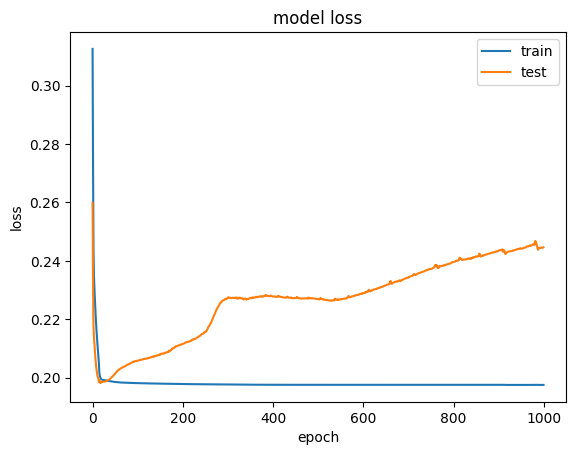

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');


In [ ]:
a1=X_test.iloc[2:3]

In [ ]:
a1

,az,ay,ax,gz,gy,gx,yaw,qx,qz,roll,qw,qy,pitch
428,0.027997,-0.036293,0.107005,-0.017409,0.046569,-0.015794,-1.329699,-0.128255,0.609002,-0.012306,-0.775209,0.108247,0.337040


In [ ]:
pp=autoencoder.predict(a1)
pp
mse1= np.mean(np.power(X_test.iloc[2:3] - pp, 2), axis=1)
mse1

1/1 [==============================] - 0s 40ms/step


428   0.183883
dtype: float64

In [ ]:
predictions = autoencoder.predict(X_test)


mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})


error_df.describe()

7/7 [==============================] - 0s 2ms/step


,reconstruction_error,true_class
count,195.000000,195.000000
mean,0.244509,0.246154
std,0.083154,0.431878
min,0.183157,0.000000
25%,0.188130,0.000000
50%,0.194609,0.000000
75%,0.350450,0.000000
max,0.398237,1.000000


In [ ]:
groups = error_df.groupby('true_class')
for name, group in groups:
  print(name)
  print(group)

0
     reconstruction_error  true_class
220              0.188183           0
428              0.183883           0
326              0.188077           0
72               0.223397           0
181              0.190654           0
131              0.193751           0
231              0.186519           0
277              0.188556           0
281              0.186792           0
249              0.195966           0
81               0.196419           0
247              0.187579           0
363              0.186323           0
69               0.211763           0
10               0.206991           0
341              0.188197           0
63               0.224690           0
54               0.257325           0
177              0.197103           0
299              0.192532           0
31               0.209717           0
55               0.306350           0
174              0.190483           0
209              0.322400           0
110              0.202288           0
210       

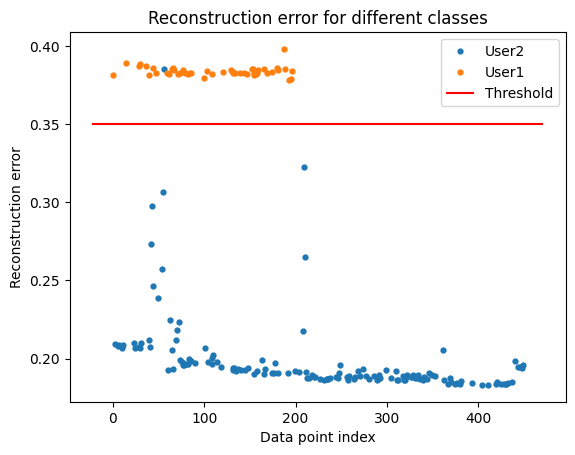

In [ ]:
threshold=0.35
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "User1" if name == 1 else "User2")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

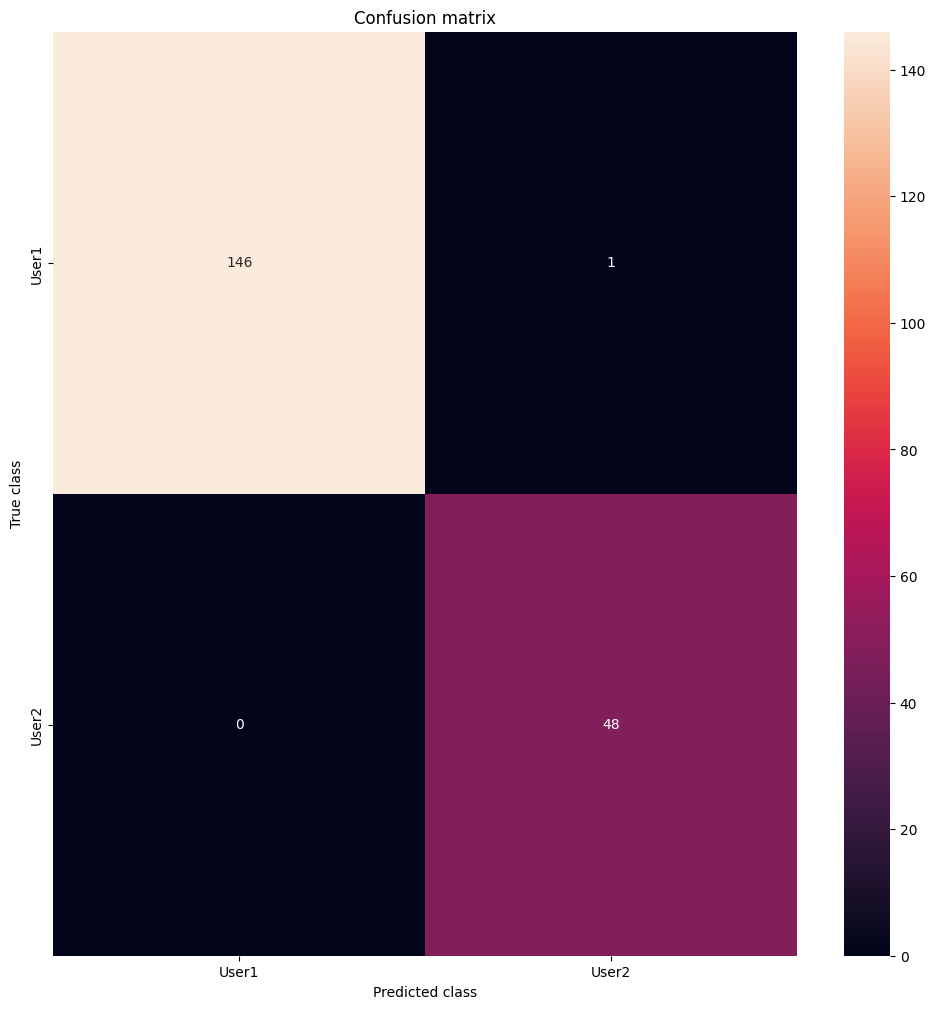

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
LABELS = ["User1", "User2"]
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
autoencoder.save("Autoencoder.h5")

In [ ]:
import torch
model_save_name = 'autoencoder.pt'
path = F"/content/gdrive/My Drive/dataset/{model_save_name}"
torch.save(model.state_dict(), path)

NameError: ignored